# THE SPARKS FOUNDATION
# Data Science and Business Analytics Intern
# Task 6 - Prediction using Decision Tree Algorithm
# To Create the Decision Tree classifier for solving the Iris Dataset and visualize it graphically.
# Made with ❤️ by Nishaanth K

# 1) Importing the required Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# 2) Loading Dataset

In [2]:
data=pd.read_csv("/content/Iris.csv",index_col=0)

# 3) Explore the Dataset

In [3]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [6]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [7]:
data.isnull == True

False

### There is no null value in the Dataset .Our dataset is perfectly alright. So, we can now visualize our Data.

# 4) Performing Data Visualization

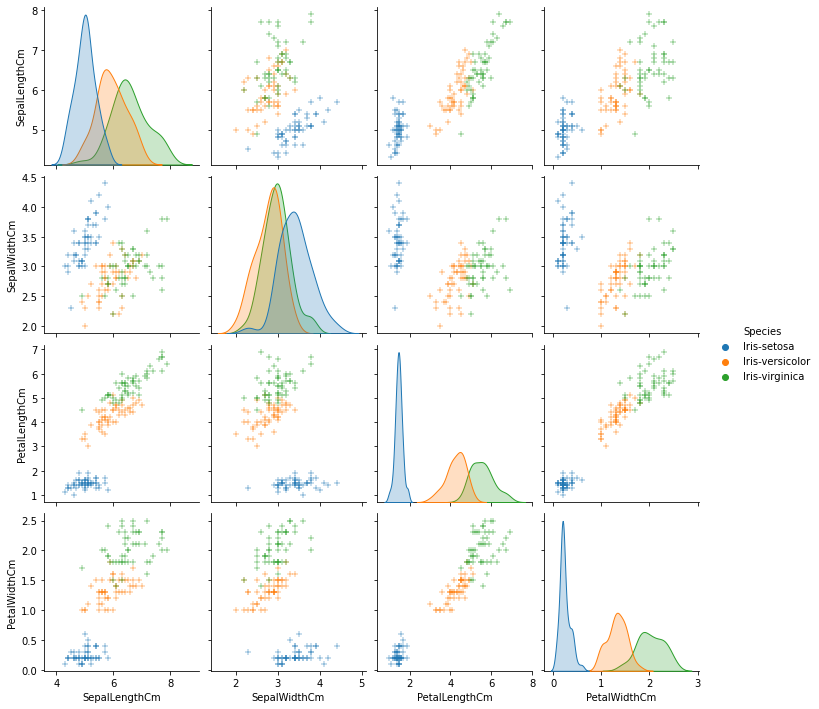

In [8]:
g=sns.pairplot(data,hue="Species",markers="+")
plt.show()

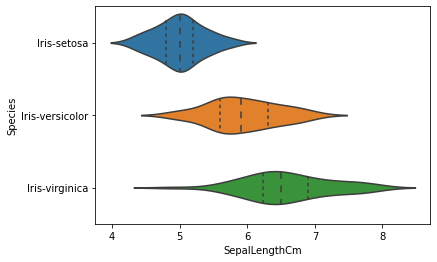

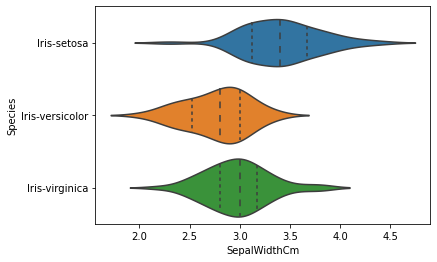

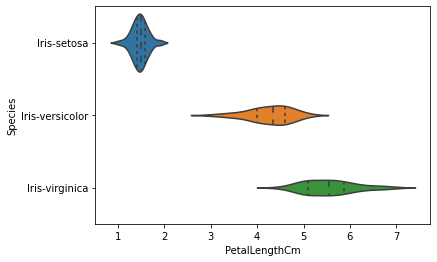

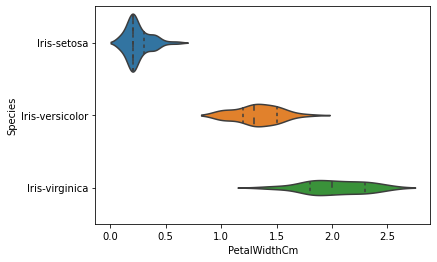

In [9]:
g = sns.violinplot(y='Species', x='SepalLengthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='SepalWidthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalLengthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalWidthCm', data=data, inner='quartile')
plt.show()

# 6) Data Processing

In [10]:
species=data['Species']
final_data=data.copy()
final_data=final_data.drop('Species', axis=1)
final_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


In [11]:
x=data.iloc[:, [0,1,2,3]].values
label=LabelEncoder()
data['Species']=label.fit_transform(data['Species'])
y=data['Species'].values

# 7) Training the Decision tree model

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("Training data shape:",x_train.shape)
print("Testing data shape:",x_test.shape)

Training data shape: (120, 4)
Testing data shape: (30, 4)


In [13]:
decisionmodel=DecisionTreeClassifier()
decisionmodel.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# 8) Classification and Accuracy check

In [14]:
y_pred=decisionmodel.predict(x_test)
print("Classification :\n",classification_report(y_test,y_pred))

Classification :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [15]:
print("Accuracy:",sm.accuracy_score(y_test,y_pred))

Accuracy: 1.0


## Our model gives 100% Accuracy rate. So, it seems to be a "GOOD MODEL".
## This satisfies me maximum 😇

# 9) Visualization of our Decision Tree model

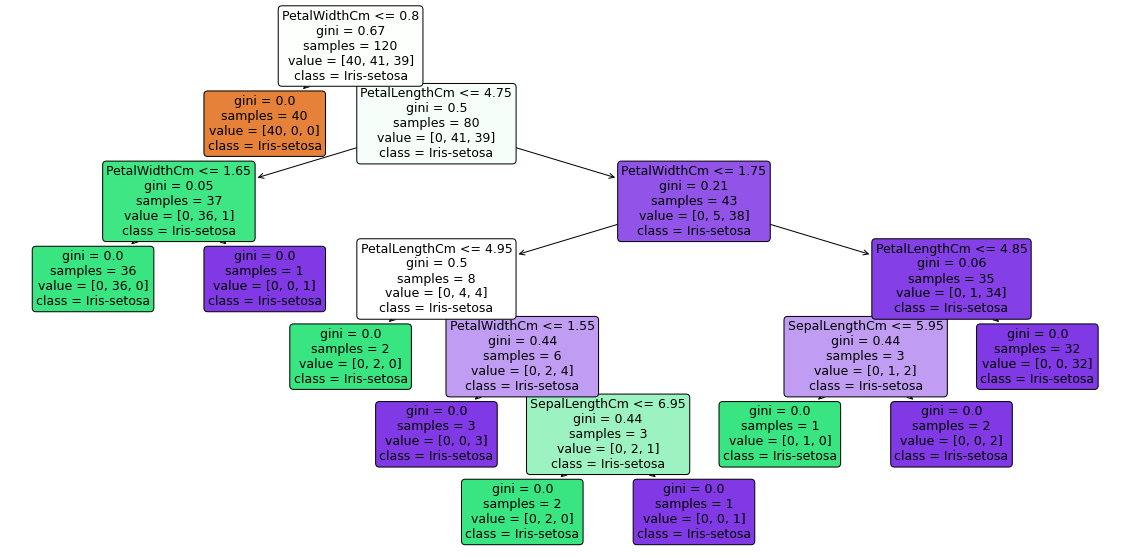

In [16]:
plt.figure(figsize=(20,10))
tree=plot_tree(decisionmodel,feature_names=final_data.columns,precision=2,rounded=True,filled=True,class_names=species.values)

# Conclusion

## Our Decision Tree Model is successfully created and Visualized.
## Also our model gives 100% Accuracy rate